<a href="https://colab.research.google.com/github/ShenZi-Ast/Drug-Discovery/blob/main/StepByStep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1 **Computational Drug Discovery**

Sina Astian

***Collecting Bioactivity Data***

**Steps :**

1.   Installing & importing required libraries
2.   Using [ChEMBL](https://www.ebi.ac.uk/chembl/) data base to select our desired target
3. Filtering potency of a substance (IC50)
4. Processing unique ChEMBL ID, SMILES, Standard Value of each compound
5. Joining the databases


📘 **Step 1.1 :**

Installing and importing required libraries

In [3]:
pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

📘 **Step 1.2:**

Searching in ChEMBL database to find the desired chemical compound, which in this case is **"NAME OF THE COMPUND"**

In [5]:
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,28.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,28.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


In [6]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL220'

📘 **Step3:**

 Filtering activity data of the selected chemical compund based on **standard_type="IC50**" and save it to a DataFrame and csv file as Bio_activity.csv

In [7]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")


In [8]:
#df = pd.DataFrame.from_dict(res)
#df

In [9]:
df = pd.read_csv('Bio_activity.csv')
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25111481,[],CHEMBL5265203,Inhibition of AChE (unknown origin),B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.16
9087,NaN,NaN,25402914,[],CHEMBL5303778,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,5.10
9088,NaN,NaN,25402962,[],CHEMBL5303826,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.00
9089,NaN,NaN,25403899,[],CHEMBL5303876,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.20


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                1315 non-null   object 
 1   activity_comment           1338 non-null   object 
 2   activity_id                9091 non-null   int64  
 3   activity_properties        9091 non-null   object 
 4   assay_chembl_id            9091 non-null   object 
 5   assay_description          9091 non-null   object 
 6   assay_type                 9091 non-null   object 
 7   assay_variant_accession    0 non-null      float64
 8   assay_variant_mutation     0 non-null      float64
 9   bao_endpoint               9091 non-null   object 
 10  bao_format                 9091 non-null   object 
 11  bao_label                  9091 non-null   object 
 12  canonical_smiles           9056 non-null   object 
 13  data_validity_comment      640 non-null    objec

In [11]:
df.to_csv('Bio_activity.csv', index=False)

📘 **Step 4:**

Removing **null** and **duplicated** values from standard_value and canonical_smiles


In [12]:
df2= df[df.standard_value.notna()]
df2= df[df.canonical_smiles.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25111481,[],CHEMBL5265203,Inhibition of AChE (unknown origin),B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.16
9087,NaN,NaN,25402914,[],CHEMBL5303778,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,5.10
9088,NaN,NaN,25402962,[],CHEMBL5303826,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.00
9089,NaN,NaN,25403899,[],CHEMBL5303876,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.20


In [13]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25111481,[],CHEMBL5265203,Inhibition of AChE (unknown origin),B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.16
9087,NaN,NaN,25402914,[],CHEMBL5303778,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,5.10
9088,NaN,NaN,25402962,[],CHEMBL5303826,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.00
9089,NaN,NaN,25403899,[],CHEMBL5303876,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.20


**Step5:**Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

In [14]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00
...,...,...,...
9086,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00
9087,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28
9088,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00
9089,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73


**Step5:** Indicating each compund status as (Active,Intermediate,Inactive) by creating a bioactivity class and defining the threshold.

In [15]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

**Step6:**

In [16]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4 = df4.dropna()
df4.to_csv('First_Tabel.csv', index=False)
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
7525,CHEMBL4649545,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,100000.0,active
7526,CHEMBL4646747,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,48000.0,intermediate
7527,CHEMBL4634465,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,54000.0,inactive
7528,CHEMBL4637652,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,100000.0,inactive


In [17]:
! ls -l

total 5496
-rw-r--r-- 1 root root 5198613 Jul 22 15:17 Bio_activity.csv
-rw-r--r-- 1 root root  421069 Jul 22 15:17 First_Tabel.csv
drwxr-xr-x 1 root root    4096 Jul 18 13:22 sample_data


# PART 2

cerating a no smile list FOR WHAT ?

In [18]:
df_no_smiles = df4.drop(columns='canonical_smiles')

In essence, this code extracts the longest substring from each canonical smiles string in the dataframe, likely to remove any additional information or fragments attached to the main smiles representation.

This type of cleaning can be helpful in ensuring consistency and accuracy when working with SMILES data in cheminformatics or drug discovery tasks.

In [19]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [20]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df5 = df_clean_smiles.dropna()
df5

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
7525,CHEMBL4649545,100000.0,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...
7526,CHEMBL4646747,48000.0,intermediate,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...
7527,CHEMBL4634465,54000.0,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...
7528,CHEMBL4637652,100000.0,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...


In [21]:
! ls -l

total 5496
-rw-r--r-- 1 root root 5198613 Jul 22 15:17 Bio_activity.csv
-rw-r--r-- 1 root root  421069 Jul 22 15:17 First_Tabel.csv
drwxr-xr-x 1 root root    4096 Jul 18 13:22 sample_data


**PART 2** Investigating Druglikness with rule of LIPINSKI

Lipinski's Rule stated the following:

1.  Molecular weight < 500 Dalton
2.  Octanol-water partition coefficient (LogP) < 5
3. Hydrogen bond donors < 5
4. Hydrogen bond acceptors < 10






In [22]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 18.3 MB/s eta 0:00:00


In [23]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [24]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [25]:
df_lipinski = lipinski(df5.canonical_smiles)
df_lipinski.dropna(subset=['MW','LogP','NumHDonors','NumHAcceptors']) #added to solve NaN data in df _combined
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5062,480.473,2.9682,0.0,9.0
5063,480.473,2.9682,0.0,9.0
5064,480.473,2.9682,0.0,9.0
5065,465.502,3.0686,0.0,8.0


In [26]:
df5.reset_index(drop=True, inplace=True)
df_lipinski.reset_index(drop=True, inplace=True)

In [27]:
df_combined = pd.concat([df5,df_lipinski], axis=1)
df_combined.to_csv('Second_Tabel.csv', index=False)
df_combined

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
5062,CHEMBL4649545,100000.0,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0
5063,CHEMBL4646747,48000.0,intermediate,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0
5064,CHEMBL4634465,54000.0,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0
5065,CHEMBL4637652,100000.0,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,465.502,3.0686,0.0,8.0


In [28]:
df_combined.dropna(subset=['MW','LogP','class','standard_value','molecule_chembl_id','canonical_smiles']) #added to solve NaN data in df_combined

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
5062,CHEMBL4649545,100000.0,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0
5063,CHEMBL4646747,48000.0,intermediate,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0
5064,CHEMBL4634465,54000.0,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0
5065,CHEMBL4637652,100000.0,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,465.502,3.0686,0.0,8.0


Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [29]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [30]:
df_combined.standard_value.describe()

count    5.067000e+03
mean     1.075285e+05
std      9.884525e+05
min      5.000000e-06
25%      1.201150e+02
50%      2.000000e+03
75%      1.516000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [31]:

-np.log10( (10**-9)* 100000000 )

1.0

In [32]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [33]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [34]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1) # 'axis=1' specifies that we're dropping a column

    return x

In [35]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...
5062,CHEMBL4649545,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,100000.0
5063,CHEMBL4646747,intermediate,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,48000.0
5064,CHEMBL4634465,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,54000.0
5065,CHEMBL4637652,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,465.502,3.0686,0.0,8.0,100000.0


In [36]:
df_norm.standard_value_norm.describe()

count    5.067000e+03
mean     1.075285e+05
std      9.884525e+05
min      5.000000e-06
25%      1.201150e+02
50%      2.000000e+03
75%      1.516000e+04
max      4.960000e+07
Name: standard_value_norm, dtype: float64

In [37]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5062,CHEMBL4649545,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.000000
5063,CHEMBL4646747,intermediate,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.318759
5064,CHEMBL4634465,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.267606
5065,CHEMBL4637652,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,465.502,3.0686,0.0,8.0,4.000000


In [38]:
df_final.pIC50.describe()

count    5067.000000
mean        5.873562
std         1.597745
min         1.304518
25%         4.819302
50%         5.698970
75%         6.920403
max        14.301030
Name: pIC50, dtype: float64

**Removing the 'intermediate' bioactivity class**
Here, we will be removing the intermediate class from our data set.


---



***WTF SHOULD I REMOVE THE NAN FROM THIS PART ???????? TAKE A LOOK AT LINE [55]***


---
why it dosent change the data frame here ?
df_2class.dropna(subset=['canonical_smiles','class','molecule_chembl_id','LogP','MW'])


In [39]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class.to_csv('Third_Tabel.csv', index=False)
df_2class

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5061,CHEMBL4636736,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,485.536,4.2132,0.0,7.0,4.000000
5062,CHEMBL4649545,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.000000
5064,CHEMBL4634465,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.267606
5065,CHEMBL4637652,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,465.502,3.0686,0.0,8.0,4.000000


Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors
Import library **bold text**


---



In [40]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

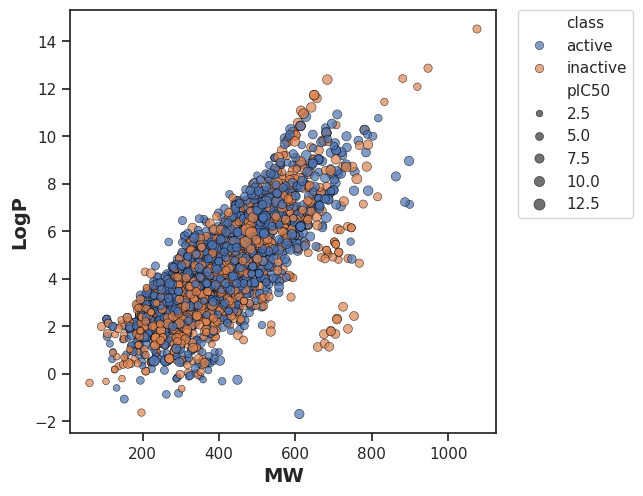

In [41]:

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

<ipython-input-42-fd667696f017>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_2class, edgecolor='black', palette=colors)


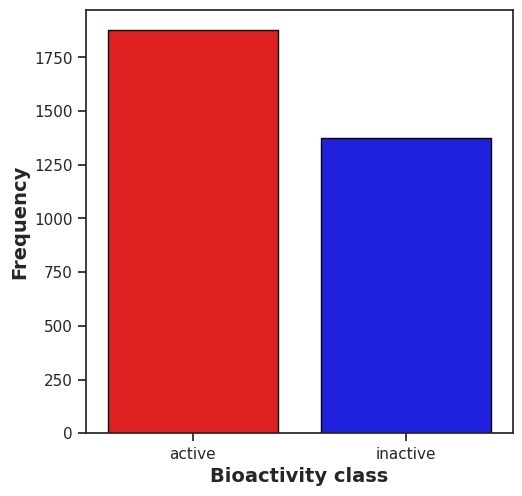

In [42]:
plt.figure(figsize=(5.5, 5.5))

# Define a color palette
colors = ["#FF0000", "#0000FF"]  # Example: Red for inactive, blue for active

sns.countplot(x='class', data=df_2class, edgecolor='black', palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

<ipython-input-43-c361dafa3884>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'pIC50', data = df_2class,palette=colors)


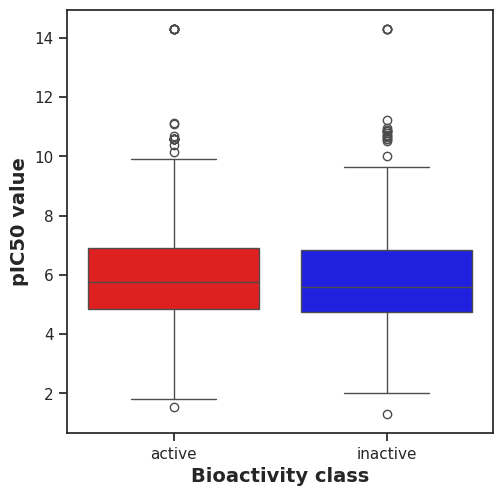

In [43]:
plt.figure(figsize=(5.5, 5.5))
colors = ["#FF0000", "#0000FF"]
sns.boxplot(x = 'class', y = 'pIC50', data = df_2class,palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [44]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [45]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1354006.0,0.017485,0.05,Different distribution (reject H0)


***MW***

<ipython-input-46-58783d171dd8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'MW', data = df_2class,palette=colors)


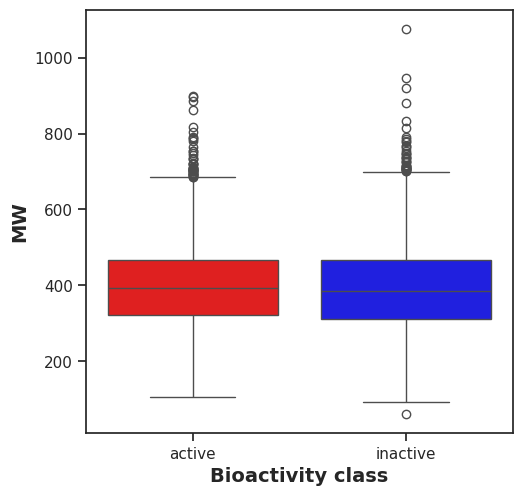

In [46]:
plt.figure(figsize=(5.5, 5.5))
colors = ["#FF0000", "#0000FF"]
sns.boxplot(x = 'class', y = 'MW', data = df_2class,palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')


In [47]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1324834.5,0.202706,0.05,Same distribution (fail to reject H0)


**LOGP**

<ipython-input-48-30649b48c138>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'LogP', data = df_2class,palette=colors)


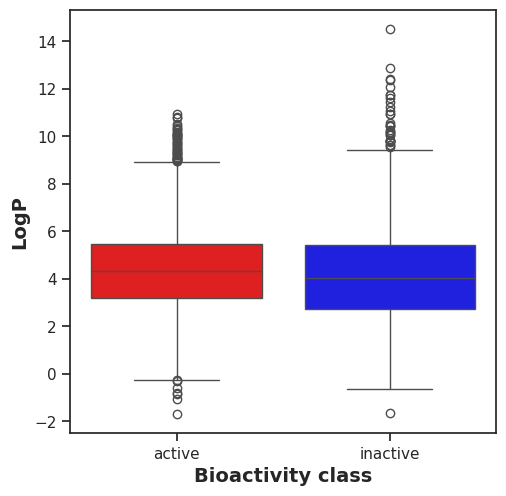

In [48]:
plt.figure(figsize=(5.5, 5.5))
colors = ["#FF0000", "#0000FF"]
sns.boxplot(x = 'class', y = 'LogP', data = df_2class,palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [49]:
mannwhitney('LogP')


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1383471.0,0.000483,0.05,Different distribution (reject H0)


**NumHDonors**


---



<ipython-input-50-8a06a0b143cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette=colors)


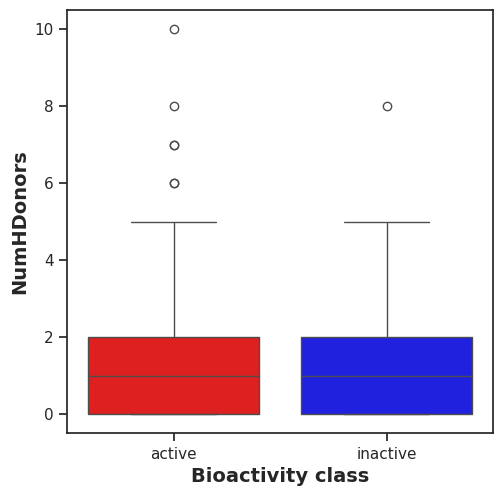

In [50]:
plt.figure(figsize=(5.5, 5.5))
colors = ["#FF0000", "#0000FF"]
sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [51]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1265142.0,0.302535,0.05,Same distribution (fail to reject H0)


**NumHAcceptors**


---



<ipython-input-52-60398e4fe1a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette=colors)


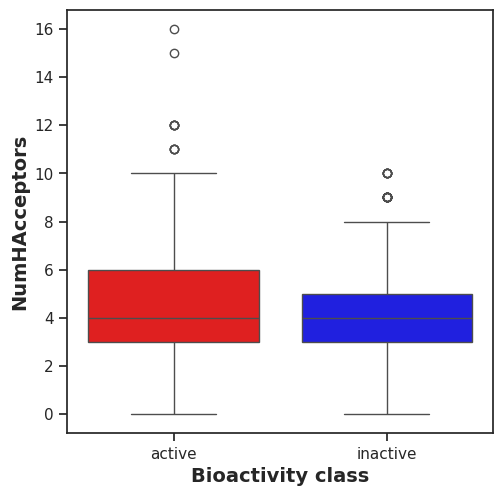

In [52]:
plt.figure(figsize=(5.5, 5.5))
colors = ["#FF0000", "#0000FF"]
sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [53]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1351105.0,0.02118,0.05,Different distribution (reject H0)


# PART 3

**IN H2 DONNERS AND ACCEPTORS COMPAIERD TO THE TUT DIFFRENCE CAN BE SEEN, SHOULD WE REMOVE NULL OR 0 NUMBERS ?**


---



**Interpretation of Statistical Results
Box Plots
pIC50 values


---


Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.


---


Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.**

---



**PART 3 OF TUT**

---

In Part 3, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building in Part 4.

*Reminder;*   **CALLING df_final**

In [54]:
df_final

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5062,CHEMBL4649545,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.000000
5063,CHEMBL4646747,intermediate,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.318759
5064,CHEMBL4634465,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.267606
5065,CHEMBL4637652,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,465.502,3.0686,0.0,8.0,4.000000


Instaling required librearies : padelpy and padel-wrapper ⚡

---



In [55]:
pip install padelpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 41.7 MB/s eta 0:00:00


In [56]:
pip install padel-pywrapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for install-jdk: filename=install_jdk-0.3.0-py3-none-any.whl size=3725 sha256=e5d27373663198bc8ac3a7af979955f4d9b8eb5f502e4624dc7c3b687dda8b5d
  Stored in directory: /root/.cache/pip/wheels/79/7a/47/9a4619174f7ca0f1068edb7a5412730a37365b6d183b0b3847
Successfully built install-jdk


In [57]:
selection = ['canonical_smiles','molecule_chembl_id']
df4_selection = df4[selection]                                 ## DF3 in tutarial cheeeeek it more
df4_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [58]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


In [59]:
! cat molecule.smi | wc -l

5067


**Calculate fingerprint descriptors**

---
Calculate PaDEL descriptors


**DL PADEL from SheZi-Ast Github**

In [60]:
! wget https://github.com/ShenZi-Ast/Drug-Discovery/raw/main/padel.zip
! wget https://github.com/ShenZi-Ast/Drug-Discovery/raw/main/padel.sh

--2024-07-22 15:17:56--  https://github.com/ShenZi-Ast/Drug-Discovery/raw/main/padel.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ShenZi-Ast/Drug-Discovery/main/padel.zip [following]
--2024-07-22 15:17:57--  https://raw.githubusercontent.com/ShenZi-Ast/Drug-Discovery/main/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   151MB/s    in 0.2s    

2024-07-22 15:17:58 (151 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-07-22 15:17:58--  https://github.com/ShenZi-Ast

! unzip padel.zip

---

! cat padel.sh

---

! bash padel.sh

**CAN BE REMOVED ?**

In [61]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [62]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [63]:
! bash padel.sh

Streaming output truncated to the last 5000 lines.
Processing CHEMBL1420 in molecule.smi (67/5067). Average speed: 0.40 s/mol.
Processing CHEMBL556172 in molecule.smi (68/5067). Average speed: 0.39 s/mol.
Processing CHEMBL154263 in molecule.smi (69/5067). Average speed: 0.39 s/mol.
Processing CHEMBL544669 in molecule.smi (70/5067). Average speed: 0.39 s/mol.
Processing CHEMBL155111 in molecule.smi (72/5067). Average speed: 0.39 s/mol.
Processing CHEMBL62664 in molecule.smi (71/5067). Average speed: 0.39 s/mol.
Processing CHEMBL1203534 in molecule.smi (73/5067). Average speed: 0.39 s/mol.
Processing CHEMBL541044 in molecule.smi (74/5067). Average speed: 0.39 s/mol.
Processing CHEMBL543779 in molecule.smi (75/5067). Average speed: 0.39 s/mol.
Processing CHEMBL64011 in molecule.smi (77/5067). Average speed: 0.38 s/mol.
Processing CHEMBL155495 in molecule.smi (76/5067). Average speed: 0.38 s/mol.
Processing CHEMBL65585 in molecule.smi (78/5067). Average speed: 0.37 s/mol.
Processing CHEMBL

In [64]:
! ls -l

total 41528
-rw-r--r-- 1 root root  5198613 Jul 22 15:17 Bio_activity.csv
-rw-r--r-- 1 root root  9018132 Jul 22 15:44 descriptors_output.csv
-rw-r--r-- 1 root root   421069 Jul 22 15:17 First_Tabel.csv
drwxr-xr-x 3 root root     4096 Jul 22 15:17 __MACOSX
-rw-r--r-- 1 root root      125 Jul 22 15:17 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      123 Jul 22 15:17 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      132 Jul 22 15:17 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      131 Jul 22 15:17 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      125 Jul 22 15:17 mannwhitneyu_pIC50.csv
-rw-r--r-- 1 root root   337283 Jul 22 15:17 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Jul 22 15:17 padel.sh
-rw-r--r-- 1 root root 25768637 Jul 22 15:17 padel.zip
-rw-r--r-- 1 root root    13482 Jul 22 15:17 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    15565 Jul 22 15:17 plot_ic50.pdf
-rw-r--r-- 1 root root    14995 Ju

**X & Y Matrices**

df_4X and removing the names from it.



In [65]:
df4_X = pd.read_csv('descriptors_output.csv')

df4_X = df4_X.drop(columns=['Name'])

df4_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5062,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5063,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5064,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5065,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Y data matrix**

---
**Convert IC50 to pIC50** What was df4 ? (First tabel)


In [66]:
df4_Y = df_final['pIC50']
df4_Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5062    4.000000
5063    4.318759
5064    4.267606
5065    4.000000
5066    4.000000
Name: pIC50, Length: 5067, dtype: float64

Concating Y and X matrices

In [67]:
dataset4 = pd.concat([df4_X,df4_Y], axis=1)
dataset4

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5062,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
5063,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.318759
5064,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.267606
5065,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000


# PART 4


1.   Importing Seaborn & Sklearn
2.   Determining Input & Output features





In [68]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [69]:
X = dataset4.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5062,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5063,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5064,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5065,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
Y = dataset4.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5062    4.000000
5063    4.318759
5064    4.267606
5065    4.000000
5066    4.000000
Name: pIC50, Length: 5067, dtype: float64

Testing data dimensions by shape

In [71]:
X.shape

(5067, 881)

In [72]:
Y.shape

(5067,)

Remove low variance features

In [73]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [74]:
X.shape

(5067, 140)

Checking again to observe how many low variances are removed

**4.Data split (80/20 ratio)**

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [76]:
X_train.shape, Y_train.shape

((4053, 140), (4053,))

In [77]:
X_test.shape, Y_test.shape

((1014, 140), (1014,))

**5. Building a Regression Model using Random Forest**

In [78]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.49923597711955436

In [79]:
Y_pred = model.predict(X_test)

**6. Scatter Plot of Experimental vs Predicted pIC50 Values**



---

data=df ?? okye data base plotb?

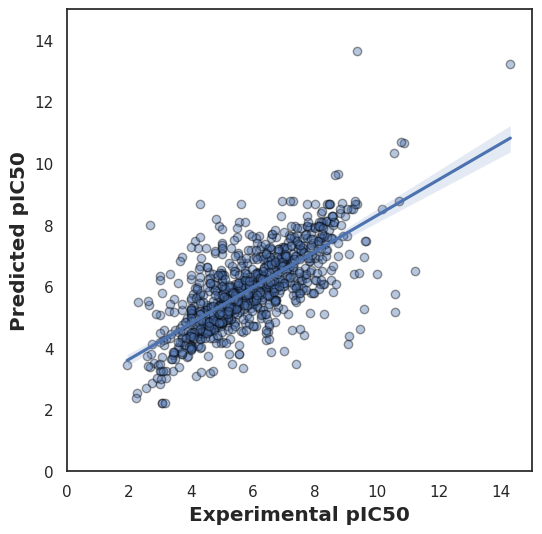

In [80]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#import pandas as pd

sns.set(color_codes=True)
sns.set_style("white")

# Combine Y_test and Y_pred into a single DataFrame for sns.regplot()
df = pd.DataFrame({'Experimental pIC50': Y_test, 'Predicted pIC50': Y_pred})

ax = sns.regplot(x='Experimental pIC50', y='Predicted pIC50', data=df, scatter_kws={'alpha':0.4,'edgecolor':'black'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 15)
ax.set_ylim(0, 15)
ax.figure.set_size_inches(6, 6)
plt.show()

# Part 5
**5.1 Importing Lazypredict library to compare diffrent ML algoritms**

In [81]:
pip install lazypredict

In [82]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**5.2 Compare ML algorithms**

In [84]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)     #all should be train ??????
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [01:07<00:01,  1.35s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 4053, number of used features: 140
[LightGBM] [Info] Start training from score 5.887797


100%|██████████| 42/42 [01:08<00:00,  1.62s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:58<00:00,  1.06it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 4053, number of used features: 140
[LightGBM] [Info] Start training from score 5.887797


100%|██████████| 42/42 [00:58<00:00,  1.39s/it]


In [85]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.87,0.87,0.57,0.17
ExtraTreeRegressor,0.87,0.87,0.57,0.18
ExtraTreesRegressor,0.87,0.87,0.57,7.96
GaussianProcessRegressor,0.87,0.87,0.57,9.77
RandomForestRegressor,0.83,0.84,0.64,4.89
XGBRegressor,0.83,0.84,0.65,1.64
BaggingRegressor,0.81,0.82,0.68,0.78
MLPRegressor,0.79,0.80,0.71,8.15
HistGradientBoostingRegressor,0.68,0.69,0.89,1.69


In [86]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.43,0.51,1.12,4.85
HistGradientBoostingRegressor,0.43,0.51,1.12,1.25
BaggingRegressor,0.41,0.49,1.14,0.55
LGBMRegressor,0.41,0.49,1.14,0.39
XGBRegressor,0.39,0.48,1.16,0.68
SVR,0.38,0.47,1.16,3.62
MLPRegressor,0.38,0.47,1.17,10.46
NuSVR,0.37,0.46,1.17,1.98
KNeighborsRegressor,0.37,0.46,1.18,0.12


**5.3 Data visualization of model performance**

**R-squared values**

[(0.0, 1.0)]

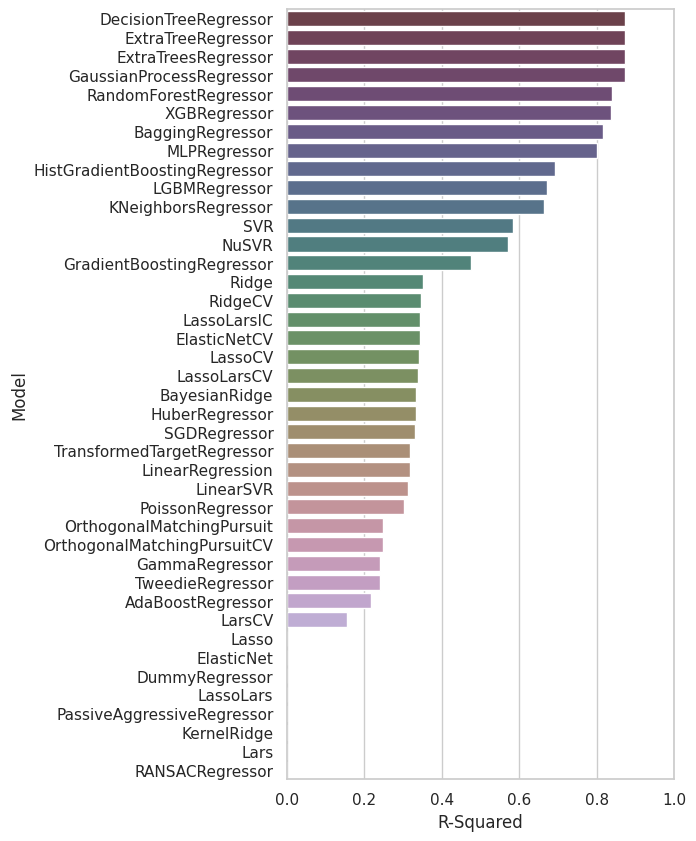

In [117]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
palette = sns.cubehelix_palette(n_colors=len(predictions_train), start=0.5, rot=-3, dark=0.3, light=0.8, reverse=True)
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train, palette=palette)
ax.set(xlim=(0, 1))

**RMSE values**

[(0.0, 10.0)]

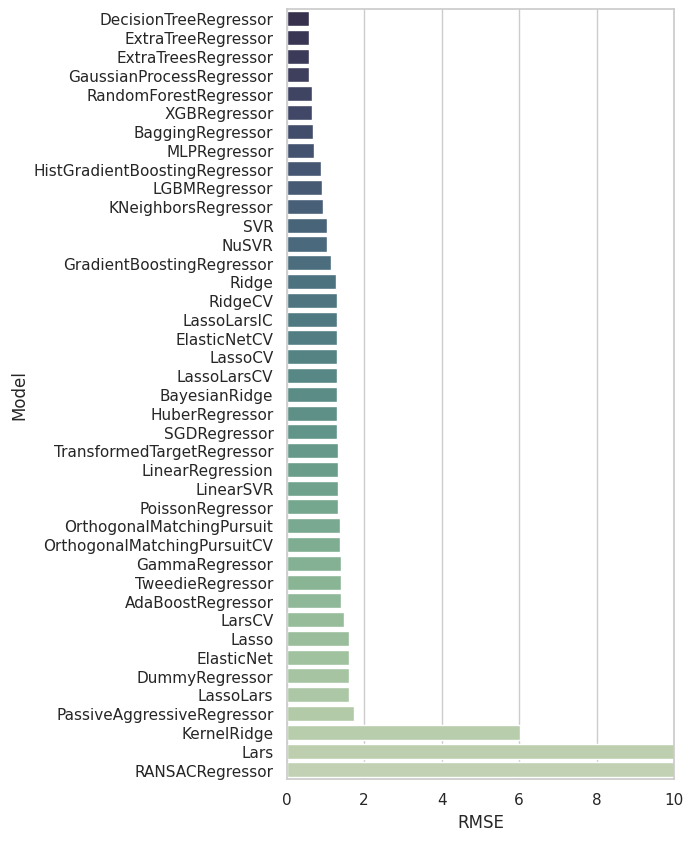

In [104]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
palette = sns.cubehelix_palette(n_colors=len(predictions_train), start=0.5, rot=-0.75, dark=0.2, light=0.8, reverse=True)
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train, palette=palette)
ax.set(xlim=(0, 10))

**calculation time**

[(0.0, 10.0)]

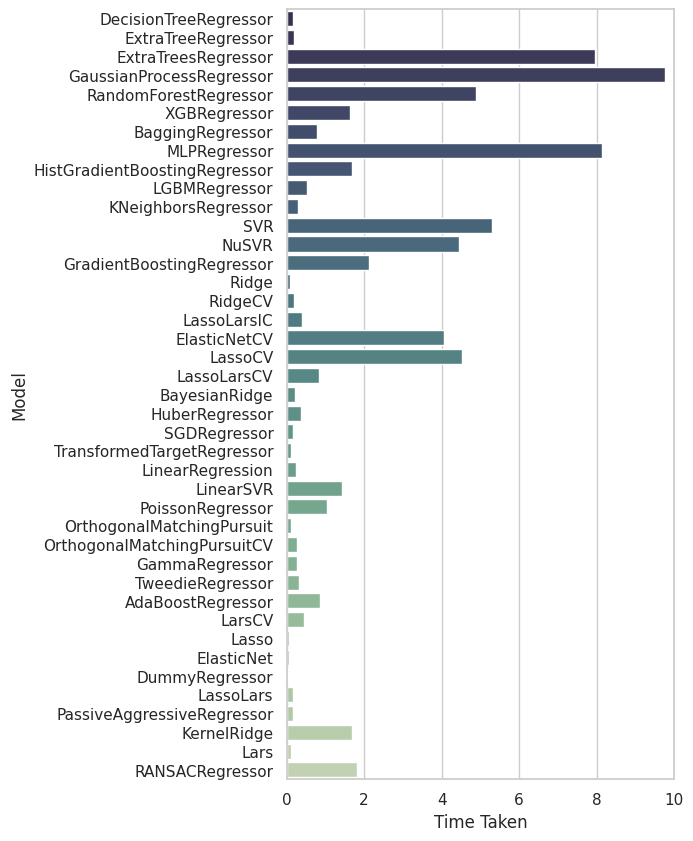

In [93]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
palette = sns.cubehelix_palette(n_colors=len(predictions_train), start=0.5, rot=-0.75, dark=0.2, light=0.8, reverse=True)
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train, palette=palette)
ax.set(xlim=(0, 10))